In [ ]:
!pip install lime

     |████████████████████████████████| 276kB 9.3MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-cp36-none-any.whl size=283845 sha256=20f294134cf9e652582656fec253e15565e40a763f07f59ec00b983701908568
  Stored in directory: /root/.cache/pip/wheels/4c/4f/a5/0bc765457bd41378bf3ce8d17d7495369d6e7ca3b712c60c89
Successfully built lime


In [ ]:
!pip show lime

Name: lime
Version: 0.2.0.1
Summary: Local Interpretable Model-Agnostic Explanations for machine learning classifiers
Home-page: http://github.com/marcotcr/lime
Author: Marco Tulio Ribeiro
Author-email: marcotcr@gmail.com
License: BSD
Location: /usr/local/lib/python3.6/dist-packages
Requires: tqdm, scikit-image, numpy, scipy, scikit-learn, matplotlib
Required-by: 


### Environnement

In [ ]:
from os.path import join
from google.colab import drive
 
ROOT = "/content/drive"
drive.mount(ROOT)
 
PROJ = "My Drive/covid19project" 
PROJECT_PATH = join(ROOT, PROJ)
 
%cd ~/content
%cd drive/My Drive/covid19project

Mounted at /content/drive
[Errno 2] No such file or directory: '/root/content'
/content
/content/drive/My Drive/covid19project


In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Test du modèle

In [ ]:
saved_model = load_model("covid60epochs150_102020.h5")

In [ ]:
image_path = "images_test_covid_bacteria/person31_bacteria_163.jpeg"

Other
accuracy = 100.0 %


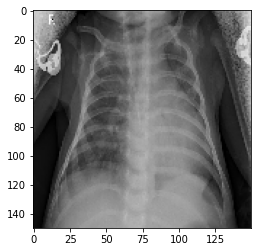

In [ ]:
img = image.load_img(image_path,target_size=(150,150))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)

output = saved_model.predict(img)

indices = {0: 'Covid-19 positive', 1: 'Other'}
predicted_class = np.asscalar(np.argmax(output, axis=1))
accuracy = round(output[0][predicted_class] * 100, 2)
label = indices[predicted_class]
print(label)
print('accuracy =',accuracy,'%')


### Interpretability 

In [ ]:
import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries

In [ ]:
explainer = lime_image.LimeImageExplainer()

In [ ]:
explanation = explainer.explain_instance(img[0], saved_model.predict, top_labels=2, hide_color=0, num_samples=100)

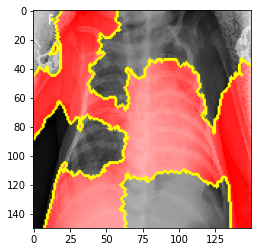

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[1], positive_only=False, num_features=7, hide_rest=False)
plt.imshow(mark_boundaries(temp , mask))

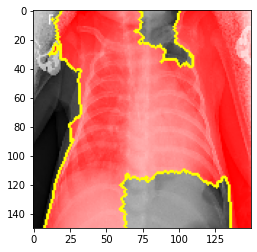

In [ ]:
temp, mask = explanation.get_image_and_mask(0, positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


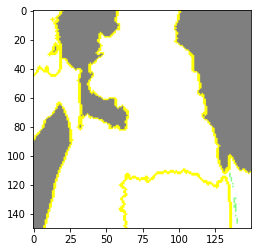

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))